In [1]:
from src import pipeline
from src.lstm_ad import LSTM_AD

import torch
import src
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)

Device:  cuda


In [2]:
window = 64
train_loader, test_loader, df = pipeline.create_sin_dataset(
    window=window,
    device=device,
    shuffle=False,
    return_val_df=True
)

In [3]:
epochs = 10
model = LSTM_AD(
    window_size=window,
    hidden_size1=20,
    hidden_size2=20,
    device=device
)
model.train(train_loader=train_loader, validation_loader=None,
            epochs=epochs, model_name="LSTM-AD",
            logdir="logs", verbose=1)

RuntimeError: input.size(-1) must be equal to input_size. Expected 1, got 64

In [6]:
loss_sum = 0
y_preds = None
for tmp_x, tmp_y, tmp_anomalies in train_loader:
    y_pred = model(tmp_x)[:, 0].cpu().detach().numpy()
    if y_preds is None:
        y_preds = y_pred
    else:
        y_preds = np.concatenate([y_preds, y_pred])

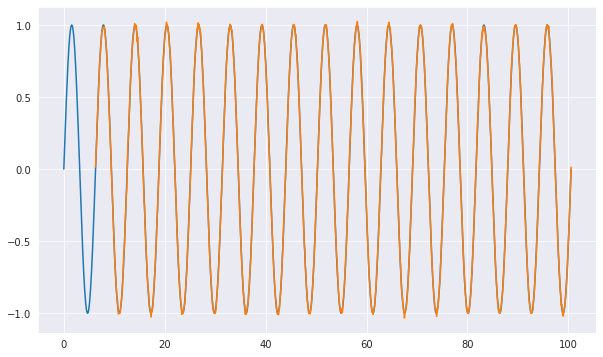

In [7]:
t = np.linspace(0, 32*np.pi, 1024)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t, np.sin(t))
ax.plot(t[window:len(y_preds)+window], y_preds);